In [0]:
import pandas as pd

In [0]:
# Load marketing_campaigns from the Delta table created in Databricks.
df = spark.table("default.marketing_campaigns").toPandas()

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUSTOMERID           100 non-null    int64  
 1   AGE                  100 non-null    int64  
 2   GENDER               100 non-null    object 
 3   INCOME               100 non-null    int64  
 4   CAMPAIGNCHANNEL      100 non-null    object 
 5   CAMPAIGNTYPE         100 non-null    object 
 6   ADSPEND              100 non-null    float64
 7   CLICKTHROUGHRATE     100 non-null    float64
 8   CONVERSIONRATE       100 non-null    float64
 9   WEBSITEVISITS        100 non-null    int64  
 10  PAGESPERVISIT        100 non-null    float64
 11  TIMEONSITE           100 non-null    float64
 12  SOCIALSHARES         100 non-null    int64  
 13  EMAILOPENS           100 non-null    int64  
 14  EMAILCLICKS          100 non-null    int64  
 15  PREVIOUSPURCHASES    100 non-null    int6

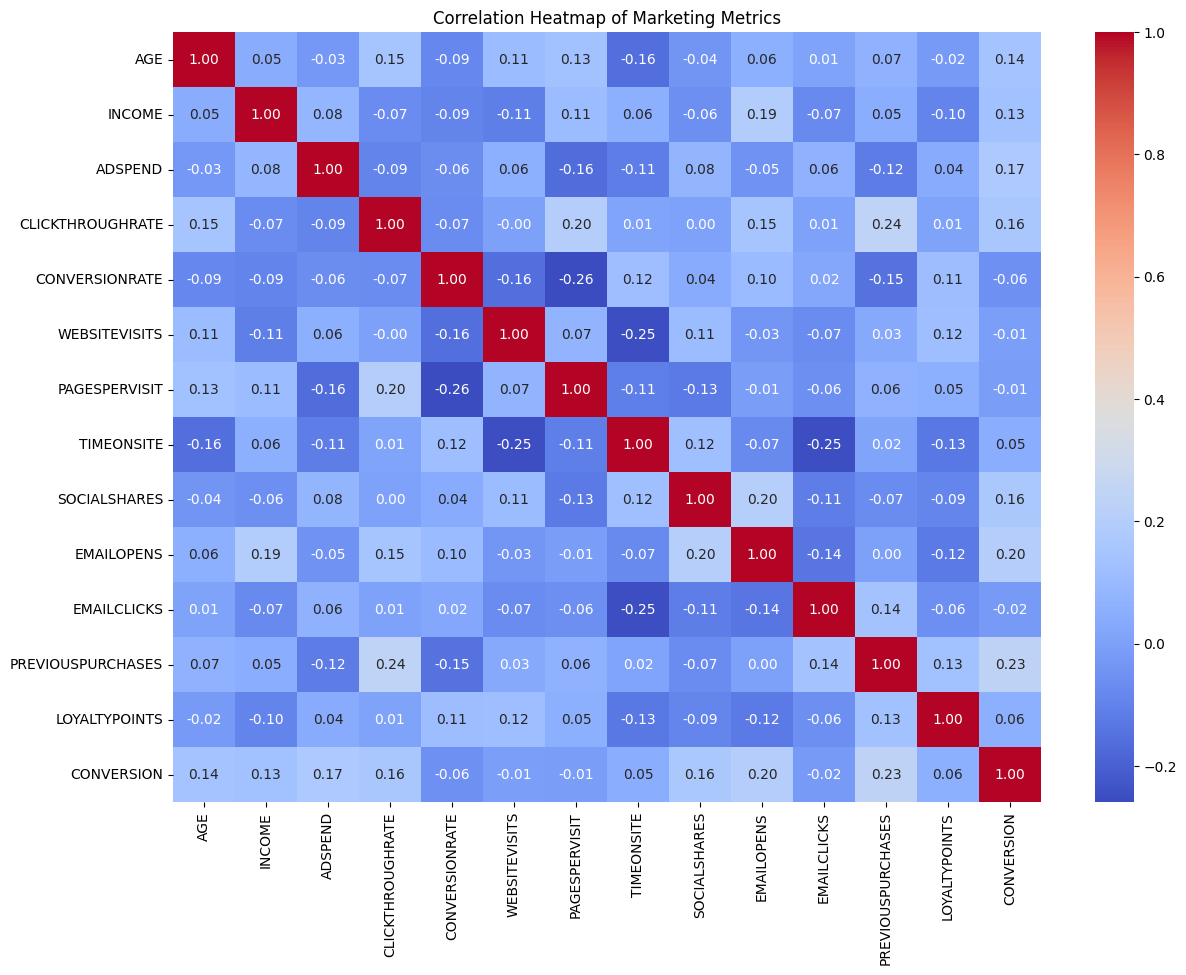

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "AGE", "INCOME", "ADSPEND", "CLICKTHROUGHRATE", "CONVERSIONRATE",
    "WEBSITEVISITS", "PAGESPERVISIT", "TIMEONSITE",
    "SOCIALSHARES", "EMAILOPENS", "EMAILCLICKS",
    "PREVIOUSPURCHASES", "LOYALTYPOINTS", "CONVERSION"
]

corr = df[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Marketing Metrics")
plt.show()


In [0]:
behavior_cols = [
    "ADSPEND",
    "WEBSITEVISITS",
    "PAGESPERVISIT",
    "TIMEONSITE",
    "SOCIALSHARES",
    "EMAILOPENS",
    "EMAILCLICKS",
    "PREVIOUSPURCHASES",
    "LOYALTYPOINTS"
]

X = df[behavior_cols].fillna(0)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(X_scaled)

In [0]:
cluster_profile = df.groupby("cluster")[behavior_cols + ["CONVERSION"]].mean()
cluster_profile

,ADSPEND,WEBSITEVISITS,PAGESPERVISIT,TIMEONSITE,SOCIALSHARES,EMAILOPENS,EMAILCLICKS,PREVIOUSPURCHASES,LOYALTYPOINTS,CONVERSION
cluster,,,,,,,,,,
0,2678.450121,25.058824,5.989575,3.772696,37.882353,12.529412,4.705882,4.176471,1109.588235,0.941176
1,5985.385901,37.034483,5.549545,5.321749,51.275862,11.000000,5.241379,5.000000,3441.275862,1.000000
2,3233.552587,20.611111,6.032129,11.617246,48.388889,6.055556,1.666667,4.055556,3003.944444,0.944444
3,6071.374249,14.194444,4.393244,8.986427,59.222222,9.694444,5.666667,3.888889,1562.194444,0.972222


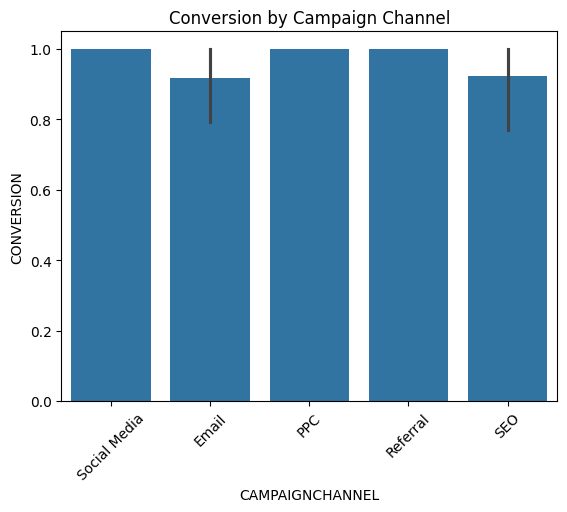

In [0]:
sns.barplot(data=df, x="CAMPAIGNCHANNEL", y="CONVERSION")
plt.xticks(rotation=45)
plt.title("Conversion by Campaign Channel")
plt.show()

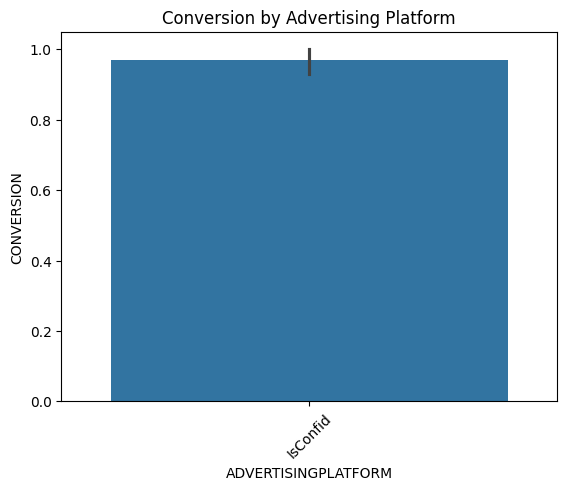

In [0]:
sns.barplot(data=df, x="ADVERTISINGPLATFORM", y="CONVERSION")
plt.xticks(rotation=45)
plt.title("Conversion by Advertising Platform")
plt.show()

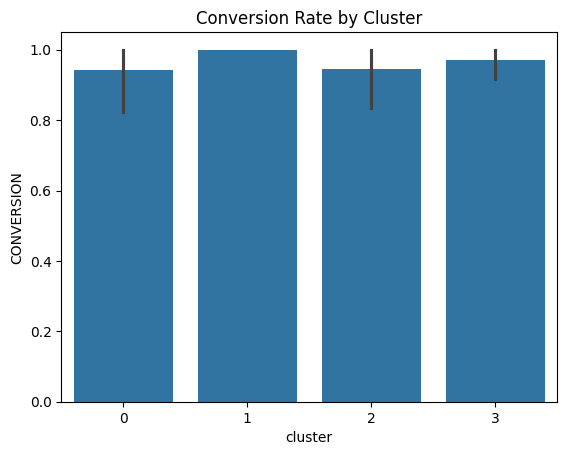

In [0]:
sns.barplot(data=df, x="cluster", y="CONVERSION")
plt.title("Conversion Rate by Cluster")
plt.show()

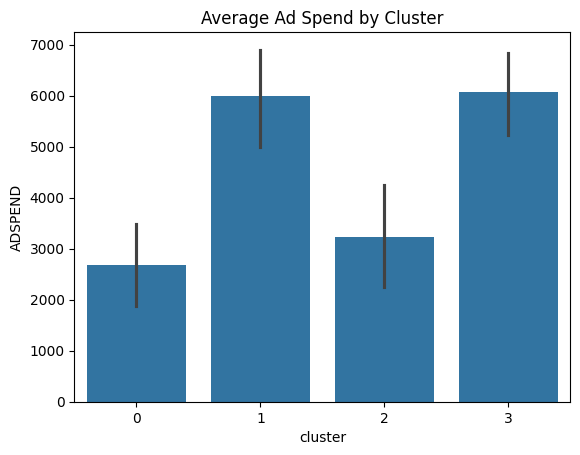

In [0]:
sns.barplot(data=df, x="cluster", y="ADSPEND")
plt.title("Average Ad Spend by Cluster")
plt.show()